# Importing Libraries

In [3]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [4]:
%run "Stock Data.ipynb".ipynb
%run "Binance API.ipynb".ipynb
%run "RiskMetrics.ipynb".ipynb
%run "PnL Computation.ipynb".ipynb

# Importing Data

## Tickers

In [7]:
binance_api_key='E90xR7UnO2oeP3lrgC50zkqUuAqyyXs4uSlAGcqIVO9n90ELrFI4gfVI2HGGxxCj'
binance_api_secret='Inls2xYl9FqPi0zlIrucfxG81drx7w6Pv6SzYFxMNoAcwDjlCKug7zUM9zB3lF9h'
Binance=BinanceAPI(binance_api_key,binance_api_secret)

In [8]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [10]:
start_date=datetime.datetime(2023,12,1)
enddate=start_date+datetime.timedelta(500)

In [11]:
quantities_api=Binance.binance_api.user_asset()
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [12]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [13]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
price=get_trade_in_usdt(trade_history)

In [14]:
book_cost=get_book_cost(price)
realized_pnl,profit_and_loss=get_pnl(book_cost,price)
historical_positions=get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

In [15]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()

In [16]:
dic={}
for key in profit_and_loss:
    dic[key]=profit_and_loss[key].to_dict()

In [17]:
realized_pnl_time=pd.DataFrame(dic).sort_index().ffill().fillna(0)
realized_pnl_time.index=pd.to_datetime(realized_pnl_time.index).round(freq='d')
realized_pnl_time=realized_pnl_time.groupby(realized_pnl_time.index).sum()

In [18]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:75].to_list()

In [19]:
holding=Binance.get_inventory()

In [20]:
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.sort_values(ascending=False,by='Price in USDT')

,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL
Total,2184.935036,3682.077600,0.9999,-131.886217,1497.14,1365.253783
OMUSDT,526.319895,1721.476694,0.4675,0.000000,1195.16,1195.160000
BTCUSDT,601.021649,860.295727,0.2336,3.537078,259.27,262.807078
JASMYUSDT,387.458505,390.695221,0.1061,0.000000,3.24,3.240000
SOLUSDT,281.200518,336.853965,0.0915,0.000000,55.65,55.650000
ETHUSDT,250.747339,224.247623,0.0609,0.000000,-26.50,-26.500000
TRXUSDT,76.868953,107.513519,0.0292,-10.723889,30.64,19.916111
BBUSDT,60.176053,39.801330,0.0108,-39.733101,-20.37,-60.103101
BNBUSDT,1.142121,1.193517,0.0003,-10.606040,0.05,-10.556040
PEPEUSDT,0.000004,0.000004,0.0000,-38.521986,0.00,-38.521986


In [21]:
data1=Binance.get_price(tickers,start_date)
data2=Binance.get_price(tickers,enddate)
data=data1.combine_first(data2)
data.index=pd.to_datetime(data.index)
#data=data.dropna(axis=1)
n=len(data.columns)
data=data.sort_index()

In [22]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [23]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [24]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [26]:
position=pd.read_excel('Positions.xlsx',index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')

positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [27]:
quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx')

quantities_tickers=list(quantities.columns)

In [28]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])

In [29]:
price_pnl.index=pd.to_datetime(price_pnl.index)
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()
for col in quantities:
    
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost.iloc[-1][col])

pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum()[0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_1088\1175112299.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum()[0]


In [30]:
pnl_history['Total']-pnl_history['Total'].shift(1)

2024-09-23           NaN
2024-09-24     23.503339
2024-09-25     -7.470131
2024-09-26     85.699217
2024-09-27     16.519121
                 ...    
2025-01-09   -170.306627
2025-01-10    113.190490
2025-01-11    -54.263495
2025-01-12    -71.018396
2025-01-13     -7.492273
Name: Total, Length: 113, dtype: float64

In [31]:
pnl_history['Total']

2024-09-23    -378.365173
2024-09-24    -354.861834
2024-09-25    -362.331965
2024-09-26    -276.632747
2024-09-27    -260.113627
                 ...     
2025-01-09    1402.766148
2025-01-10    1515.956639
2025-01-11    1461.693143
2025-01-12    1390.674748
2025-01-13    1383.182474
Name: Total, Length: 113, dtype: float64

In [32]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [33]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [34]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [35]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change())


LDUMAUSDT not retrieved
Total not retrieved


C:\Users\Admin\AppData\Local\Temp\ipykernel_1088\974280261.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  binance_data=np.log(1+binance_data.pct_change())


In [36]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [37]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [38]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

<Axes: >

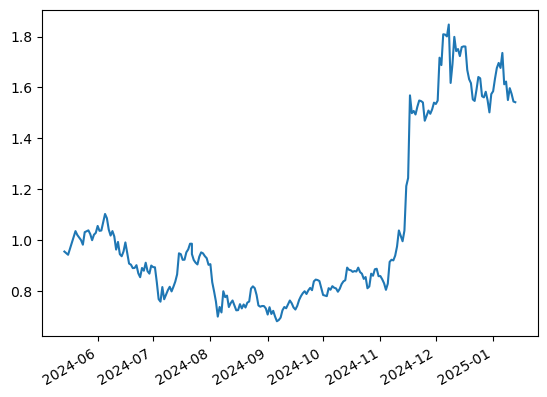

In [39]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()

## Ex ante data

In [41]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [44]:
historical_risk=RiskAnalysis(returns_to_use)
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [45]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [48]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash[0]]-0.00},
                                                                              
                                                                              {'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
OMUSDT,0.4015
BNBUSDT,0.2290
XRPUSDT,0.1587
SUIUSDT,0.1077
PEPEUSDT,0.0907
AAVEUSDT,0.0072
RAYUSDT,0.0051
RUNEUSDT,0.0000
BONKUSDT,0.0000
WLDUSDT,0.0000


In [49]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.30}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory

,Optimal Weights
OMUSDT,0.380586
BTCUSDT,0.300000
XRPUSDT,0.099460
SUIUSDT,0.087929
BNBUSDT,0.076721
PEPEUSDT,0.055304


### Current results

In [51]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

In [52]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio")#,constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit[0]]-0.40}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
BTCUSDT,0.452172
OMUSDT,0.430094
TRXUSDT,0.117734


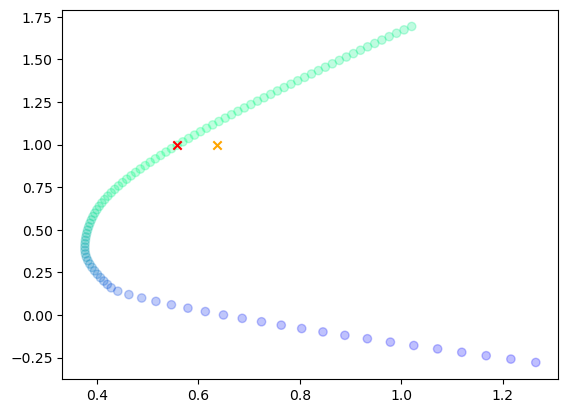

In [53]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')

## Real Portfolio vs Optimal

In [55]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison['Weights']=current_holding_comparison['Weights'].round(7)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,1721.476694,0.467529,0.430094,0.037435
BTCUSDT,860.295727,0.233644,0.452172,-0.218528
JASMYUSDT,390.695221,0.106107,0.000000,0.000000
SOLUSDT,336.853965,0.091485,0.000000,0.000000
ETHUSDT,224.247623,0.060902,0.000000,0.000000
TRXUSDT,107.513519,0.029199,0.117734,-0.088535
BBUSDT,39.801330,0.010809,0.000000,0.000000
BNBUSDT,1.193517,0.000324,0.000000,0.000000
PEPEUSDT,0.000004,0.000000,0.000000,0.000000


In [56]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,inventory],axis=1)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison['Weights']=historical_comparison['Weights'].round(7)
historical_comparison=historical_comparison.fillna(0)
historical_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,1721.476694,0.467529,0.380586,0.086943
BTCUSDT,860.295727,0.233644,0.300000,-0.066356
JASMYUSDT,390.695221,0.106107,0.000000,0.000000
SOLUSDT,336.853965,0.091485,0.000000,0.000000
ETHUSDT,224.247623,0.060902,0.000000,0.000000
TRXUSDT,107.513519,0.029199,0.000000,0.000000
BBUSDT,39.801330,0.010809,0.000000,0.000000
BNBUSDT,1.193517,0.000324,0.076721,-0.076397
PEPEUSDT,0.000004,0.000000,0.055304,-0.055304
XRPUSDT,0.000000,0.000000,0.099460,0.000000


# Risk Reward Analysis

In [58]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [59]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

<Axes: >

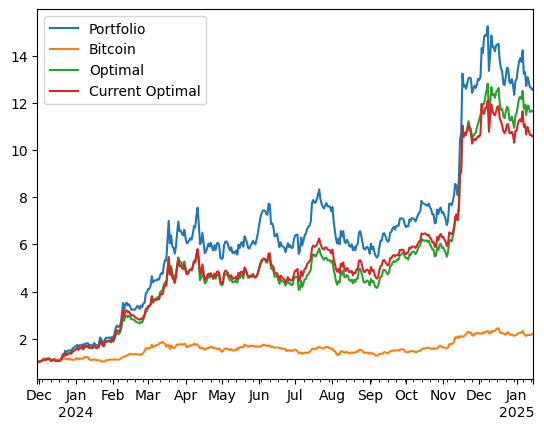

In [60]:
(1+portfolio_perf.loc[:]).cumprod().plot()

In [61]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

<Axes: >

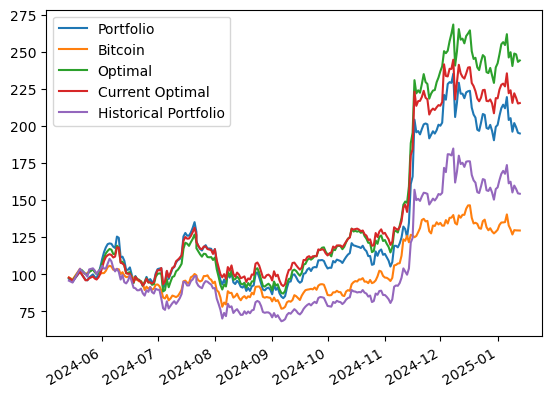

In [62]:
((1+current_perf).cumprod()*100).plot()

In [63]:
((1+current_perf).cumprod()*100).iloc[-10:]

,Portfolio,Bitcoin,Optimal,Current Optimal,Historical Portfolio
2025-01-04,214.257244,134.883397,256.447092,228.453518,169.632126
2025-01-05,211.841182,135.079783,254.465137,226.594678,167.667349
2025-01-06,219.378582,140.295083,261.795346,235.397622,173.552243
2025-01-07,203.962753,132.854249,246.070586,221.985258,161.238715
2025-01-08,205.171839,130.233268,249.649103,223.960885,162.328047
2025-01-09,196.034892,126.750994,240.337760,215.449170,155.071619
2025-01-10,201.865641,129.693358,248.746432,221.942660,159.729385
2025-01-11,199.054433,129.520567,248.212920,218.884550,157.464627
2025-01-12,195.316763,129.445338,243.115040,215.043418,154.493622
2025-01-13,194.872637,129.433070,244.070536,215.365461,154.218040


## Volatilities

In [65]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.625017
 dtype: float64,
 0.625754515184042)

In [66]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.636286
 dtype: float64,
 0.6362863346940444)

In [67]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.718457
Bitcoin            0.429681
Optimal            0.625755
Current Optimal    0.641789
dtype: float64

In [68]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.4444651588657764

## Risk Contribution

In [70]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,0.120619,0.076721,0.009744,0.027553,0.003346,0.024207
BTCUSDT,0.364998,0.300000,0.032837,0.134198,0.042435,0.091763
OMUSDT,18.101668,0.380586,0.912636,0.676417,0.569738,0.106679
PEPEUSDT,0.212681,0.055304,0.013233,0.052751,0.012081,0.040670
SUIUSDT,0.240821,0.087929,0.016233,0.060328,0.017852,0.042477
XRPUSDT,0.210712,0.099460,0.015316,0.048753,0.011147,0.037606


In [71]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,0.986600,0.430094,0.639039,0.730515,0.616786,0.113729
BTCUSDT,0.192489,0.452172,0.290793,0.201127,0.108030,0.093097
TRXUSDT,0.037822,0.117734,0.070168,0.068358,0.031471,0.036887


In [72]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,1.078141,0.47,0.711295,0.689351,0.567934,0.121417
BTCUSDT,0.097911,0.23,0.150659,0.091676,0.021552,0.070124
JASMYUSDT,-0.003798,0.11,0.048795,0.106872,0.034721,0.072150
SOLUSDT,0.003974,0.09,0.043176,0.062086,0.008217,0.053869
ETHUSDT,-0.002879,0.06,0.026245,0.027853,0.002599,0.025255
TRXUSDT,0.009638,0.03,0.018212,0.012007,0.001576,0.010432
BBUSDT,-0.006478,0.01,0.001618,0.010154,0.000395,0.009759


# Value At Risk

## Historical

### Optimal Weights

In [76]:
var,cvar=historical_risk.historical_var(opt_weights)
(var,cvar)

(-0.05115421605570299, -0.07427717735622286)

### Current Weights

In [78]:
var,cvar=current_risk.historical_var(current_weights)
(var,cvar)

(-0.048530753822559225, -0.072717354531576)

In [79]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.05
row=round(historical_var.shape[0]*centile)

In [80]:
var=historical_var.iloc[row]
var

OMUSDT      -0.034865
BTCUSDT     -0.002147
JASMYUSDT   -0.006109
SOLUSDT     -0.002769
ETHUSDT     -0.001657
TRXUSDT     -0.000430
BBUSDT      -0.001246
BNBUSDT     -0.000000
PEPEUSDT    -0.000000
Portfolio   -0.049222
Name: 2024-07-22 00:00:00, dtype: float64

In [81]:
cvar=historical_var.iloc[:row+1].mean()
cvar

OMUSDT      -0.042613
BTCUSDT     -0.008374
JASMYUSDT   -0.010488
SOLUSDT     -0.006185
ETHUSDT     -0.003041
TRXUSDT     -0.001039
BBUSDT      -0.000977
BNBUSDT      0.000000
PEPEUSDT     0.000000
Portfolio   -0.072717
dtype: float64

## Parametric

### Optimal Weights

In [84]:
var,cvar=historical_risk.parametric_var(opt_weights)

(var,cvar)

(-0.06483820427977505, -0.08310465111603134)

### Current Weights

In [86]:
var,cvar=current_risk.parametric_var(current_weights)

(var,cvar)

(-0.06592946970137, -0.08450335166833713)

## Multivariate

### Optimal Weights

In [89]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.058053590173572485, -0.07481435143829403)

### Current Weights

In [91]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06271801794948752, -0.08003110365588902)

In [92]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]

    scenario_multivariate[i]=results.to_dict()

mean_scenario_multivariate=pd.DataFrame(scenario_multivariate).T.mean()
mean_scenario_multivariate

OMUSDT      -0.041924
BTCUSDT     -0.005703
JASMYUSDT   -0.006828
SOLUSDT     -0.004217
ETHUSDT     -0.001845
TRXUSDT     -0.000872
BBUSDT      -0.000639
Portfolio   -0.062028
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [96]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.056248006840066665, -0.07189405343238016)

### Current Weights

In [98]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06147917443169357, -0.07852089099344843)

In [99]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]
    
    scenario_gaussian[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gaussian).T.mean()
mean_scenario_gaussian

OMUSDT      -0.041178
BTCUSDT     -0.006071
JASMYUSDT   -0.007184
SOLUSDT     -0.004011
ETHUSDT     -0.001795
TRXUSDT     -0.000941
BBUSDT      -0.000692
Portfolio   -0.061870
dtype: float64

## Student Copula

### Optimal Weights

In [102]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.05898763554065309, -0.07502082463895143)

### Current Weights

In [104]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06340698622122252, -0.08116707022688344)

In [105]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]
    
    scenario_t_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_t_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.043868
BTCUSDT     -0.005488
JASMYUSDT   -0.007060
SOLUSDT     -0.004058
ETHUSDT     -0.001729
TRXUSDT     -0.000411
BBUSDT      -0.000642
Portfolio   -0.063257
dtype: float64

## Gumbel Copula

### Optimal Weights

In [108]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.10758230985734364, -0.1523213679821141)

### Current Weights

In [110]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.11122405087506879, -0.1527545004681244)

In [111]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gumbel_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.100350
BTCUSDT     -0.002074
JASMYUSDT   -0.007501
SOLUSDT     -0.001076
ETHUSDT      0.000083
TRXUSDT      0.000340
BBUSDT      -0.000048
Portfolio   -0.110627
dtype: float64

## Monte Carlo

### Optimal

In [114]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [115]:
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06544892067146711, -0.08159472331530852)

### Current Weights

In [117]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06789986520356081, -0.08431435939313517)

In [118]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results
    
mean_scenario_monte_carlo=pd.DataFrame(scenario_monte_carlo).T.mean()
mean_scenario_monte_carlo

OMUSDT      -0.045315
BTCUSDT     -0.006557
JASMYUSDT   -0.007563
SOLUSDT     -0.004540
ETHUSDT     -0.001931
TRXUSDT     -0.000715
BBUSDT      -0.000725
Portfolio   -0.067346
dtype: float64

## VaR Violation

In [120]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2024-01-14,-0.054584,-0.093267,-0.077332,-0.021739
2024-01-15,-0.054584,-0.093336,-0.077217,0.023414
2024-01-16,-0.054584,-0.092778,-0.074804,0.040571
2024-01-17,-0.054584,-0.094722,-0.081736,-0.028491
2024-01-18,-0.054584,-0.097477,-0.082460,-0.038201
...,...,...,...,...
2025-01-11,-0.058083,-0.060135,-0.059277,-0.002145
2025-01-12,-0.058083,-0.060678,-0.062493,-0.020538
2025-01-13,-0.058083,-0.060543,-0.062608,0.003930
2025-01-14,-0.058083,-0.059868,-0.060727,-0.002724


In [121]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2024-05-28,-0.035735,-0.084148,-0.079770,-0.016855
2024-05-29,-0.035735,-0.081587,-0.073686,-0.008759
2024-05-30,-0.035735,-0.071378,-0.068275,0.034805
2024-05-31,-0.035735,-0.072497,-0.064902,0.038694
2024-06-01,-0.035735,-0.076207,-0.069983,0.053758
...,...,...,...,...
2025-01-11,-0.066667,-0.076120,-0.074791,-0.013926
2025-01-12,-0.066667,-0.076511,-0.076689,-0.018777
2025-01-13,-0.066667,-0.075538,-0.075115,-0.002274
2025-01-14,-0.066667,-0.072906,-0.071386,-0.006733


<Axes: >

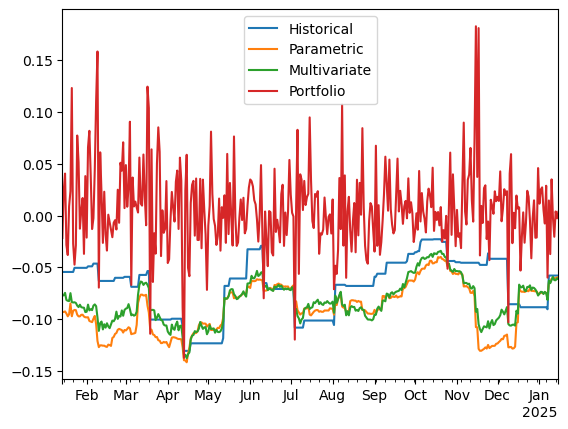

In [122]:
var_data.plot()

<Axes: >

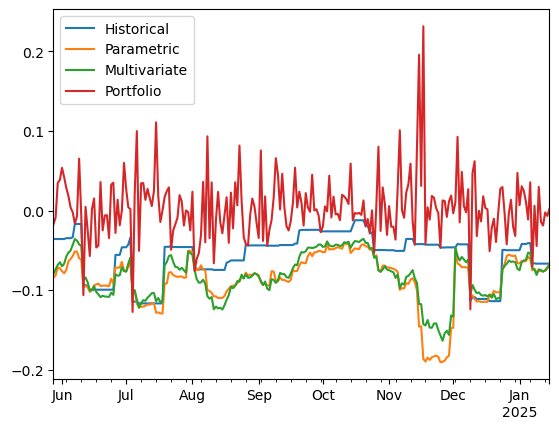

In [123]:
current_var_data.plot()

In [124]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.021739,0.01087,0.013587
Kupiec Stat,7.779813,17.176705,14.278049
P-value,0.005283,0.000034,0.000158


In [125]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.064378,0.017167,0.017167
Kupiec Stat,0.933279,7.0093,7.0093
P-value,0.334012,0.008109,0.008109


# Principal Component Analysis

## Historical PCA

In [128]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.77740758, 0.07159793, 0.05660001, 0.05202619, 0.04236829])

In [129]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

AAVEUSDT    0.015784
ADAUSDT     0.016174
ALGOUSDT    0.018180
APTUSDT     0.016501
ARBUSDT     0.017615
              ...   
WBTCUSDT    0.009385
WLDUSDT     0.022459
XLMUSDT     0.013062
XRPUSDT     0.011168
XTZUSDT     0.016613
Name: PC1, Length: 61, dtype: float64

<Axes: >

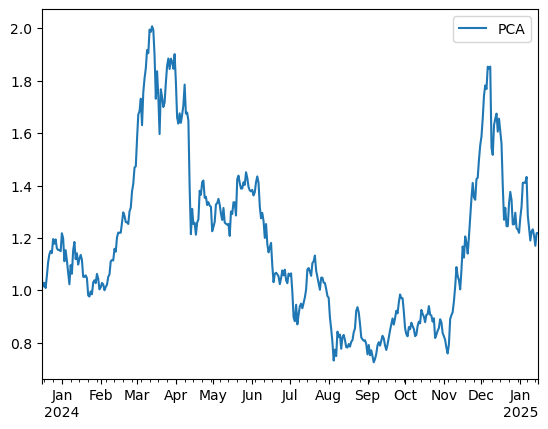

In [130]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()

<Axes: >

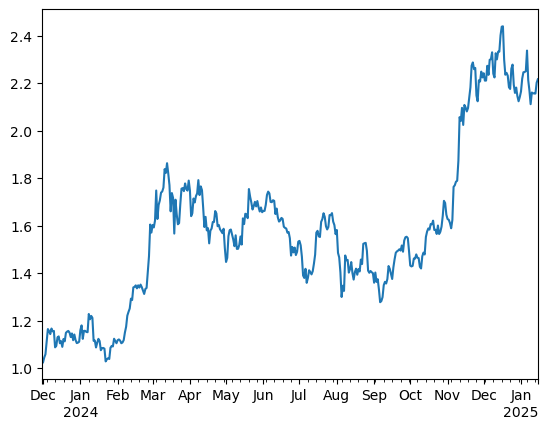

In [131]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()

In [132]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
FLOWUSDT     0.419863
WBETHUSDT    0.430342
ETHUSDT      0.430387
ETCUSDT      0.449332
               ...   
FLOKIUSDT    1.133268
WLDUSDT      1.143615
BONKUSDT     1.145791
PEPEUSDT     1.195828
OMUSDT       1.555515
Length: 62, dtype: float64

<Axes: >

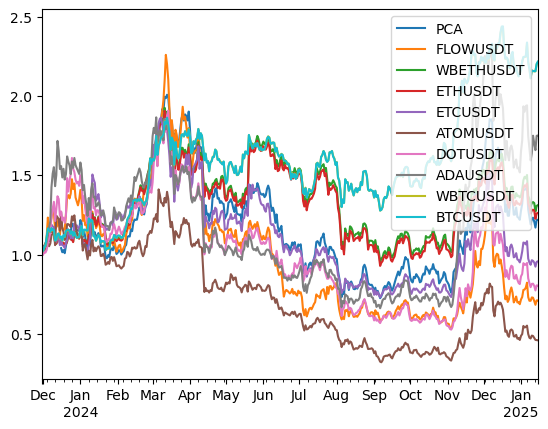

In [133]:
(1+comparison[distances.index[:10]]).cumprod().plot()

<Axes: >

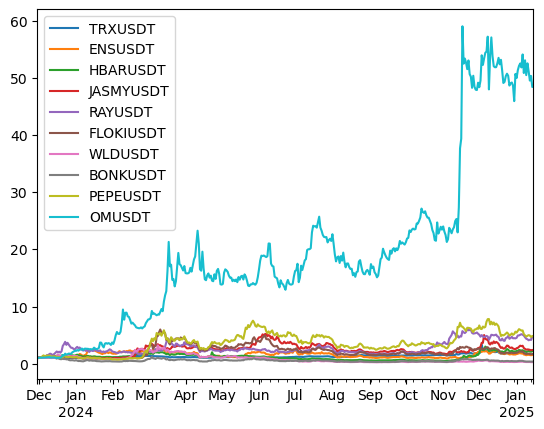

In [134]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [136]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.55249167, 0.14678994, 0.12767591, 0.09962104, 0.07342143])

In [137]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

OMUSDT       0.093801
BTCUSDT      0.061321
JASMYUSDT    0.169582
SOLUSDT      0.102719
ETHUSDT      0.084332
TRXUSDT      0.052563
BBUSDT       0.213206
BNBUSDT      0.066755
PEPEUSDT     0.155721
Name: PC1, dtype: float64

<Axes: >

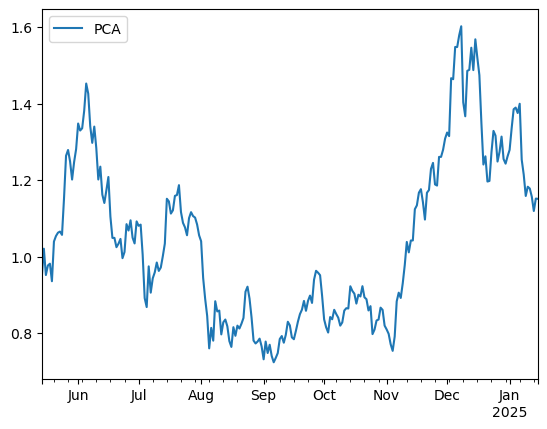

In [138]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA).cumprod().plot()

<Axes: >

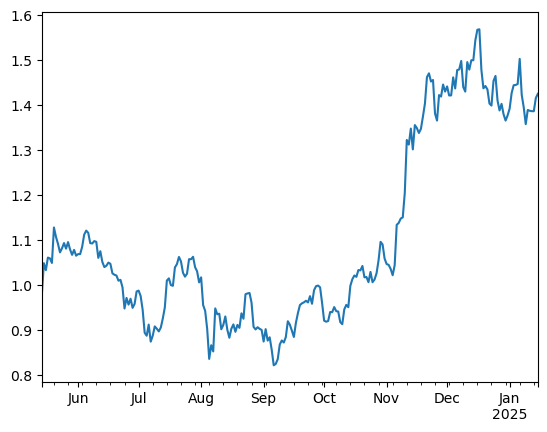

In [139]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()

In [140]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
SOLUSDT      0.404070
ETHUSDT      0.416686
BNBUSDT      0.438401
BTCUSDT      0.454292
JASMYUSDT    0.662759
PEPEUSDT     0.726145
BBUSDT       0.754859
TRXUSDT      0.892905
OMUSDT       0.919820
dtype: float64

<Axes: >

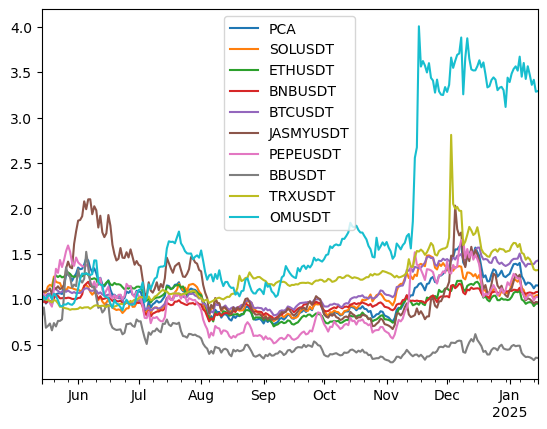

In [141]:
(1+comparison[distances.index[:10]]).cumprod().plot()

## Sensitivity Analysis

In [143]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT     1.890341
BBUSDT       1.568660
JASMYUSDT    1.291245
SOLUSDT      1.154689
BTCUSDT      1.000000
ETHUSDT      0.965114
OMUSDT       0.879922
BNBUSDT      0.662017
TRXUSDT      0.299058
Name: BTCUSDT, dtype: float64

In [144]:
days=15
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

BBUSDT       2.226868
JASMYUSDT    1.847502
PEPEUSDT     1.614826
SOLUSDT      1.463374
ETHUSDT      1.197454
BTCUSDT      1.000000
TRXUSDT      0.981224
OMUSDT       0.872123
BNBUSDT      0.641411
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [146]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [147]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
ETHUSDT,0.399432
JASMYUSDT,0.302085
BNBUSDT,0.165759
PEPEUSDT,0.148550
SOLUSDT,0.108535
BBUSDT,0.082457
BTCUSDT,-0.028218
OMUSDT,-0.059813
TRXUSDT,-0.090219


### Regression to PCA

In [149]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-15:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

0.8935732306202977

In [150]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.274052
BNBUSDT      1.153531
ETHUSDT      1.010764
PCA          1.000000
SOLUSDT      0.819505
JASMYUSDT    0.431972
PEPEUSDT     0.395690
BBUSDT       0.366765
OMUSDT       0.236947
TRXUSDT      0.225513
dtype: float64

In [151]:
reg=ex_ante_perf.copy().dropna().iloc[-15:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BNBUSDT      2.208812
BTCUSDT      1.597859
TRXUSDT      1.251593
ETHUSDT      1.251381
PCA          1.000000
SOLUSDT      0.992000
PEPEUSDT     0.824079
JASMYUSDT    0.719247
BBUSDT       0.648593
OMUSDT       0.491262
dtype: float64

### Correlation Matrix

<Axes: >

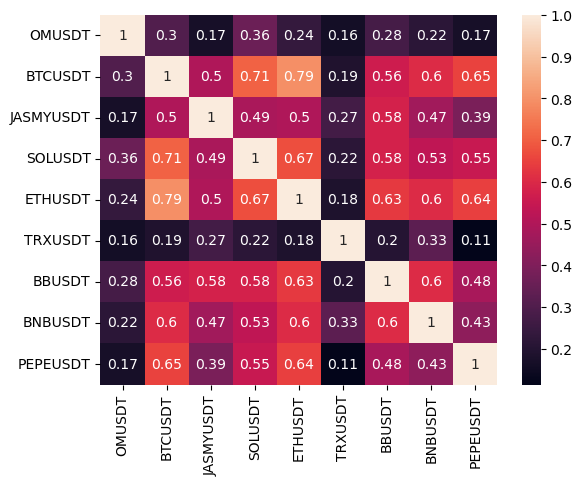

In [153]:
sns.heatmap(ex_ante_perf.corr(),annot=True)

<Axes: >

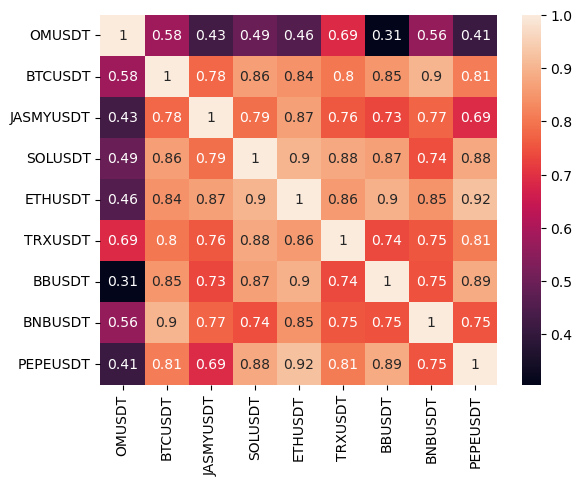

In [154]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

## Sliding window optimization

In [156]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,OMUSDT,BTCUSDT,JASMYUSDT,SOLUSDT,ETHUSDT,TRXUSDT,BBUSDT,BNBUSDT,PEPEUSDT
2024-05-27,0.000000,0.000000,0.621968,0.000000,0.000000,0.000000,0.000000,0.000000,0.378032
2024-06-10,0.625939,0.000000,0.150852,0.000000,0.000000,0.223209,0.000000,0.000000,0.000000
2024-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-07-08,0.182528,0.000000,0.000000,0.000000,0.000000,0.817472,0.000000,0.000000,0.000000
2024-07-22,0.133242,0.414562,0.000000,0.112009,0.000000,0.340186,0.000000,0.000000,0.000000
2024-08-05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.926694,0.000000,0.073306,0.000000
2024-09-02,0.435138,0.000000,0.000000,0.000000,0.000000,0.564862,0.000000,0.000000,0.000000
2024-09-16,0.287440,0.000000,0.000000,0.000000,0.000000,0.000000,0.712560,0.000000,0.000000
2024-09-30,0.176666,0.000000,0.000000,0.000000,0.165949,0.527049,0.000000,0.000000,0.130336


In [157]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0]

for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBETHUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT,XTZUSDT
2024-06-09,0.007546,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-07-09,0.007546,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.953403,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-08-08,0.446305,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.553695,0.0
2024-09-07,0.525081,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.474919,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-10-07,0.037978,0.0,0.0,0.108268,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164239,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-11-06,0.007546,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.237262,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-12-06,0.007546,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003581,0.107490,0.0
2025-01-05,0.324339,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2025-01-15,0.007546,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.992382,0.0
